<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module2-polynomial-regression/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [2]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

0.9.0


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
print('Shape:', df.shape)
pd.set_option('display.max_columns', 100)
df.head(5)

Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Try plotting all features against log(SalePrice)

In [0]:
df['SalePrice'] = np.log(df['SalePrice'])

## Try some correlations between features and output

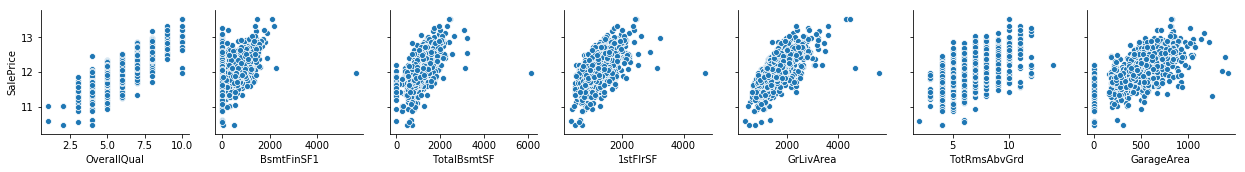

In [6]:
selected = df[['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 
                'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']].copy()
sns.pairplot(data = selected, y_vars = ['SalePrice'],
            x_vars = selected.columns.drop('SalePrice'));

### How do the correlations look

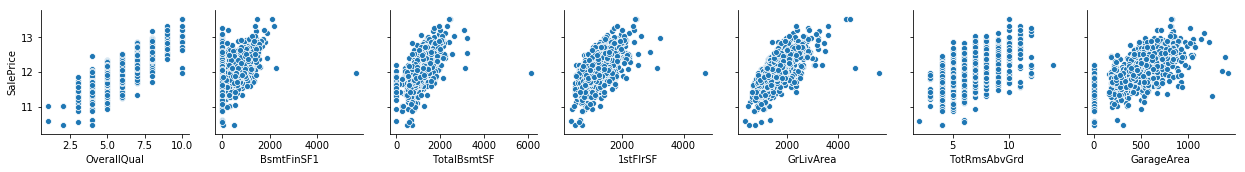

In [7]:
sns.pairplot(data = selected, y_vars = ['SalePrice'],
            x_vars = selected.columns.drop('SalePrice'));

## Clean your data as required

In [8]:
selected.isnull().sum()

OverallQual     0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
GarageArea      0
SalePrice       0
dtype: int64

### No cleaning required here.  Let's do the linear regression and find MSE and $R^2$

In [9]:
def find_mse_r2(df, y_col_name):
  X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(y_col_name, axis = 1),
                      df[y_col_name],
                      test_size = 0.25)
  
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  R2 = r2_score(y_test, y_pred)
  
  return (RMSE, R2)

RMSE, R2 = find_mse_r2(selected, 'SalePrice')
print('RMSE:', RMSE, 'R2:', R2)

RMSE: 0.16634301036935692 R2: 0.8238421881448219


## Let's do feature engineering

In [10]:
numbers = ['int64', 'float64']
df_numerical = df.select_dtypes(include = numbers).copy()
df_numerical.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


### We're going to use these engineered features:
  - Basement (BsmtFinSF1, BsmtFinType1, BsmtFinSF2, BsmtFinType2, TotalBsmtSF, BsmtQual, BsmtCond, BsmtFullBath, BsmtHalfBath)
  - Age (YrSold - YearBuilt)
  - Lot (LotFrontage, LotArea)
  - Garage (garageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond)
  - Roof (RoofStyle, RoofMatl)
  - Exterior (Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond)
  - Heating (Heating, HeatingQC, CentralAir)
  - Porch (OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch)
  - Kitchen (KitchenAbvGr, KitchenQual)
  - Sale (SaleType, SaleCondition)
  
  We have selected these because it would be what I would look for when buying a house.  Also, there are not many NULL values in these features.  We will replace NULL values with average values.  The only NULL value numerical features are:
  - LotFrontage
  - GarageYrBlt
  - BsmtQual
  - BsmtCond
  - BsmtFinType1
  - BsmtFinType2
  - GarageFinish
  - GarageQual
  - GarageCond


In [42]:
df_numerical.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
Age                0
dtype: int64

In [24]:
df_categorical = df.select_dtypes(exclude = numbers).copy()
df_categorical['Id'] = df[['Id']]
df_categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
Id                  0
dtype: int64

### Let's get the age of the house

In [25]:
df_numerical['Age'] = df_numerical['YrSold'] - df_numerical['YearBuilt']
df_numerical.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,7
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,91
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,8


### Let's get the engineered feature 'Lot'
This includes the features LotFrontage, LotArea, Street, LotShape, LotConfig, and LandSlope

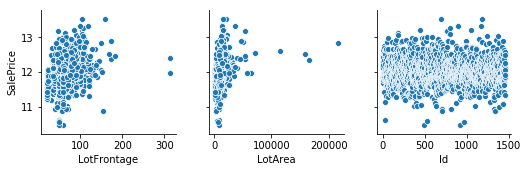

In [32]:
df_lot = df_numerical[['LotFrontage', 'LotArea', 'SalePrice']].copy()
df_lot['Id'] = df_numerical['Id']
sns.pairplot(data = df_lot, y_vars = ['SalePrice'], 
             x_vars = df_lot.drop('SalePrice', axis = 1).columns);

#### Remove outliers

In [33]:
Q1 = df_lot.quantile(0.25)
Q3 = df_lot.quantile(0.75)
IQR = Q3 - Q1
df_lot_without_outliers = df_lot[~((df_lot < Q1 - 1.5 * IQR) |
                                   (df_lot > Q3 + 1.5 * IQR)).any(axis = 1)]
print('df.shape:', df.shape)
print('df_lot_without_outliers.shape:', df_lot_without_outliers.shape)
print('rows lost:', df.shape[0] - df_lot_without_outliers.shape[0])
df_lot_without_outliers.head(5)

df.shape: (1460, 81)
df_lot_without_outliers.shape: (1299, 4)
rows lost: 161


,LotFrontage,LotArea,SalePrice,Id
0,65.0,8450,12.247694,1
1,80.0,9600,12.109011,2
2,68.0,11250,12.317167,3
3,60.0,9550,11.849398,4
4,84.0,14260,12.429216,5


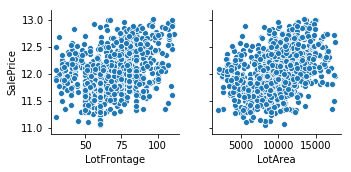

In [28]:
sns.pairplot(data = df_lot_without_outliers, y_vars = ['SalePrice'], 
             x_vars = df_lot.drop('SalePrice', axis = 1).columns);

### Engineered feature 'Garage'

'Garage' feature is based on: GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond

In [86]:
garage_finish = { 'fin': 3, 'rfn': 2, 'unf': 1, 'na': 0, 'nan': 0}
garage_cond   = { 'ex': 5, 'gd': 4, 'ta': 3, 'fa': 2, 'po': 1, 'na': 0, 'nan': 0}
garage_qual   = { 'ex': 5, 'gd': 4, 'ta': 3, 'fa': 2, 'po': 1, 'na': 0, 'nan': 0}
  
garage = df_numerical[['Id', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']]
garage = garage.append(df_categorical[['GarageFinish', 'GarageQual', 'GarageCond']])
garage['GarageFinish'] = garage['GarageFinish'].astype('str')
garage['GarageFinish'] = garage['GarageFinish'].apply(lambda x: garage_finish[x.lower()])
garage['GarageFinish'] = garage['GarageFinish'].astype('int')

garage['GarageCond'] = garage['GarageCond'].astype('str')
garage['GarageCond'] = garage['GarageCond'].apply(lambda x: garage_cond[x.lower()])
garage['GarageCond'] = garage['GarageCond'].astype('int')

garage['GarageQual'] = garage['GarageQual'].astype('str')
garage['GarageQual'] = garage['GarageQual'].apply(lambda x: garage_cond[x.lower()])
garage['GarageQual'] = garage['GarageQual'].astype('int')

print('\nNumber of unique values:\n', garage.nunique())

# Find all unique values in each updated categorical variable
print('\nUnique values in GarageFinish:', garage['GarageFinish'].unique())
print('Unique values in GarageCond:', garage['GarageCond'].unique())
print('Unique values in GarageQual:', garage['GarageQual'].unique())

# Find number of non-null values in each column
print('\nNumber of non-null values:\n', garage.count())


Number of unique values:
 GarageArea       441
GarageCars         5
GarageCond         6
GarageFinish       4
GarageQual         6
GarageYrBlt       97
Id              1460
SalePrice        663
dtype: int64

Unique values in GarageFinish: [0 2 1 3]
Unique values in GarageCond: [0 3 2 4 1 5]
Unique values in GarageQual: [0 3 2 4 5 1]

Number of non-null values:
 GarageArea      1460
GarageCars      1460
GarageCond      2920
GarageFinish    2920
GarageQual      2920
GarageYrBlt     1379
Id              1460
SalePrice       1460
dtype: int64


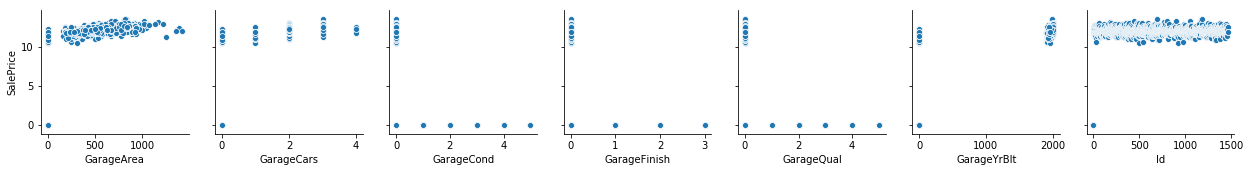

In [91]:
sns.pairplot(data = garage, y_vars = ['SalePrice'],
             x_vars = garage.drop('SalePrice', axis = 1).columns);

In [89]:
garage.fillna(0, inplace = True)
# garage['GarageValue'] = garage['GarageArea']

0        548.0
1        460.0
2        608.0
3        642.0
4        836.0
5        480.0
6        636.0
7        484.0
8        468.0
9        205.0
10       384.0
11       736.0
12       352.0
13       840.0
14       352.0
15       576.0
16       480.0
17       516.0
18       576.0
19       294.0
20       853.0
21       280.0
22       534.0
23       572.0
24       270.0
25       890.0
26       576.0
27       772.0
28       319.0
29       240.0
30       250.0
31       271.0
32       484.0
33       447.0
34       556.0
35       691.0
36       672.0
37       498.0
38       246.0
39         0.0
40       440.0
41       308.0
42       504.0
43       308.0
44       300.0
45       576.0
46       670.0
47       826.0
48         0.0
49       386.0
50       388.0
51       528.0
52       516.0
53       894.0
54       572.0
55       576.0
56       480.0
57       565.0
58       641.0
59       352.0
60       576.0
61       288.0
62       484.0
63       480.0
64       645.0
65       852.0
66       5

GarageArea      None
GarageCars      None
GarageCond      None
GarageFinish    None
GarageQual      None
GarageYrBlt     None
Id              None
SalePrice       None
dtype: object

GarageArea       441
GarageCars         5
GarageCond         6
GarageFinish       4
GarageQual         6
GarageYrBlt       97
Id              1460
SalePrice        663
dtype: int64

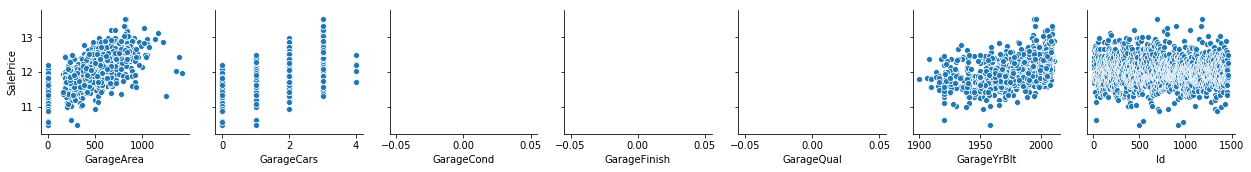

In [47]:
sns.pairplot(data = garage, y_vars = ['SalePrice'],
            x_vars = garage.drop('SalePrice', axis = 1).columns)

In [16]:
print('df_categorical.shape:', df_categorical.shape)
df_categorical.isnull().sum()

df_categorical.shape: (1460, 43)


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [17]:
# sns.pairplot(data = df, y_vars = ['SalePrice'],
#              x_vars = df.iloc[:, :40].columns);
# sns.pairplot(data = df, y_vars = ['SalePrice'],
#              x_vars = ['Alley']);
sns.stripplot(x = ['Alley', 'MSZoning'], y = 'SalePrice', data = df);

TypeError: ignored

In [0]:
sns.pairplot(data = df, y_vars = ['SalePrice'],
             x_vars = df.iloc[:, 40:].drop(['SalePrice'], axis = 1).columns);

In [0]:
poly_features = df[['BsmtUnfSF', 'GarageYrBlt', 'ScreenPorch', 'SalePrice']].copy()
poly_features.isnull().sum()

In [0]:
avg_garage_yr_built = df['GarageYrBlt'].mean()
poly_features['GarageYrBlt'].fillna(avg_garage_yr_built, inplace = True)
poly_features.isnull().sum()

In [0]:
print(poly_features.head(5))
squared_poly_features = poly_features ** 2
squared_poly_features.head(5)

In [0]:
squared_poly_features['SalePrice'] = \
  squared_poly_features['SalePrice'].apply(np.sqrt)
squared_poly_features.head(5)

In [0]:
sns.pairplot(data = squared_poly_features, y_vars = ['SalePrice'],
             x_vars = squared_poly_features.drop('SalePrice', axis = 1).columns);

### Handle the house age (YearBuilt - YrSold)

In [0]:
other_df = pd.DataFrame(df['YearBuilt'] - df['YrSold'], columns = ['Age'])
other_df.head(5)

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data